# Introduction to PyTorch

https://pytorch.org/tutorials/beginner/basics/intro.html

- [0. Quickstart](#0.-Quickstart)
- [1. Tensors](#1.-Tensors)




## 0. Quickstart

### Working with data

PyTorch has two [primitives to work with data](https://pytorch.org/docs/stable/data.html): 
- `torch.utils.data.Dataset` stores the samples and their corresponding labels.
- `torch.utils.data.DataLoader` wraps an iterable around the Dataset.

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

PyTorch offers domain-specific libraries such as TorchText, TorchVision, and TorchAudio, all of which include datasets.

The `torchvision.datasets` module contains `Dataset` objects for many real-world vision data like CIFAR, COCO [(full list here)](https://pytorch.org/vision/stable/datasets.html). In this tutorial, we use the FashionMNIST dataset. Every TorchVision Dataset includes two arguments: `transform` and `target_transform` to modify the samples and labels respectively.

In [2]:
%%capture
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

We pass the `Dataset` as an argument to `DataLoader`. This wraps an iterable over our dataset, and supports automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.

In [3]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


## 1. Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model's parameters.

Tensors are similar to [NumPy’s](https://numpy.org/) ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see [Bridge with NumPy](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#bridge-to-np-label)). Tensors are also optimized for automatic differentiation (we’ll see more about that later in the [Autograd](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html) section). If you're familiar with ndarrays, you'll be right at home with the Tensor API. If not, follow along!

In [4]:
import numpy as np

### 1.1. Initializing a Tensor

#### Directly from data

In [5]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

#### From a Numpy array

[Bridge with NumPy](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#bridge-to-np-label)

In [6]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

#### From another tensor

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.

In [7]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.7192, 0.2923],
        [0.8325, 0.6019]]) 



#### With random or constant values

In [8]:
# shape is a tuple of tensor dimensions. In the functions below, 
# it determines the dimensionality of the output tensor.

shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.7297, 0.5134, 0.1583],
        [0.8428, 0.5989, 0.2471]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 1.2 Attributes of a Tensor

Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [9]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### 1.3 Operations on Tensors

Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing, indexing, slicing), sampling and more are comprehensively described [here](https://pytorch.org/docs/stable/torch.html).

By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using `.to` method (after checking for GPU availability). Keep in mind that copying large tensors across devices can be expensive in terms of time and memory!

In [10]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    
tensor.device

/home/lxf470/anaconda3/envs/torch/lib/python3.9/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /tmp/pip-req-build-4hw0h122/c10/cuda/CUDAFunctions.cpp:115.)
  return torch._C._cuda_getDeviceCount() > 0


device(type='cpu')

#### Standard numpy-like indexing and slicing:

In [11]:
tensor = torch.ones(4, 4)
print('First row: ', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


#### Joining tensors

[`torch.cat`](https://pytorch.org/docs/stable/generated/torch.cat.html): concatenate a sequence of tensors along a __given__ dimension.  
[`torch.stack`](https://pytorch.org/docs/stable/generated/torch.stack.html): concatenates sequence of tensors along a __new__ dimension.

In [12]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
t2 = torch.stack([tensor, tensor, tensor], dim=1)
print(t1)
print(t2)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])
tensor([[[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]])


In [13]:
test = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(torch.stack([test, test, test, test], dim=0))
print(torch.stack([test, test, test, test], dim=1))
print(torch.stack([test, test, test, test], dim=2))

tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]]])
tensor([[[1, 2, 3],
         [1, 2, 3],
         [1, 2, 3],
         [1, 2, 3]],

        [[4, 5, 6],
         [4, 5, 6],
         [4, 5, 6],
         [4, 5, 6]]])
tensor([[[1, 1, 1, 1],
         [2, 2, 2, 2],
         [3, 3, 3, 3]],

        [[4, 4, 4, 4],
         [5, 5, 5, 5],
         [6, 6, 6, 6]]])


#### Arithmetic operations

In [14]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

#### Single-element tensors

If you have a one-element tensor, for example by aggregating all values of a tensor into one value, you can convert it to a Python numerical value using `item()`:

In [15]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


#### In-place operations 
Operations that store the result into the operand are called in-place. They are denoted by a `_` suffix. For example: `x.copy_(y)`, `x.t_()`, will change `x`.
- `torch.t(input)` Expects input to be <= 2-D tensor and transposes dimensions 0 and 1. 0-D and 1-D tensors are returned as is. When input is a 2-D tensor this is equivalent to transpose(input, 0, 1).

In [16]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


<div class="alert alert-info"><h4>Note</h4><p>In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss
     of history. Hence, their use is discouraged.</p></div>

### 1.4 Bridge with NumPy

Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other.

#### Tensor to NumPy array

In [17]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


#### NumPy array to Tensor

In [18]:
n = np.ones(5)
t = torch.from_numpy(n)

# Changes in the NumPy array reflects in the tensor.

np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## 2. Datasets & DataLoaders

Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data. `Dataset` stores the samples and their corresponding labels, and `DataLoader` wraps an iterable around the `Dataset` to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that subclass `torch.utils.data.Dataset` and implement functions specific to the particular data. They can be used to prototype and benchmark your model. You can find them here: 
- `torchvision`, [Image Datasets](https://pytorch.org/vision/stable/datasets.html)
- `torchtext`, [Text Datasets](https://pytorch.org/text/stable/datasets.html)
- `torchaudio`, [Audio Datasets](https://pytorch.org/audio/stable/datasets.html)

### 2.1 Loading a Dataset

Fashion-MNIST is a dataset of Zalando`s article images consisting of 60,000 training examples and 10,000 test examples. Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

Parameters:
- `root` is the path where the train/test data is stored
- `train` specifies training or test dataset,
- `download=True` downloads the data from the internet if it's not available at `root`.
- `transform` and `target_transform` specify the feature and label transformations.

In [19]:
from torch.utils.data import Dataset

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### 2.2 Iterating and Visualizing the Dataset

We can `index Datasets` manually like a list: `training_data[index]`. We use `matplotlib` to visualize some samples in our training data.

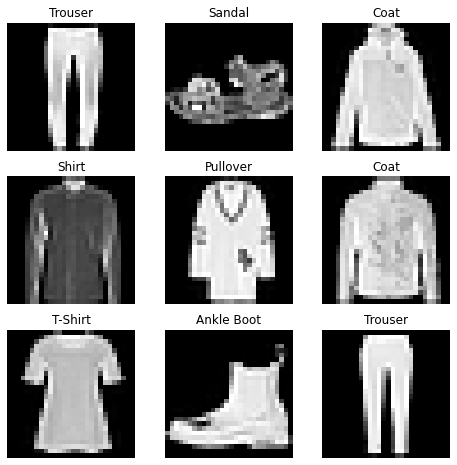

In [20]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### 2.3 Creating a custom Dataset for your files

A custom Dataset class must implement three functions: `__init__`, `__len__`, and `__getitem__`. Take a look at this implementation; the FashionMNIST images are stored in a directory `img_dir`, and their labels are stored separately in a CSV file `annotations_file`.

#### `__init__`
is run once when instantiating the Dataset object. We initialize the directory containing the images, the annotations file, and both transforms.

#### `__len__`
returns the number of samples in our dataset.

#### `__getitem__`
loads and returns a sample from the dataset at the given index idx. Based on the index, it identifies the image’s location on disk, converts that to a tensor using read_image, retrieves the corresponding label from the csv data in self.img_labels, calls the transform functions on them (if applicable), and returns the tensor image and corresponding label in a tuple.

In [21]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

### 2.4 Preparing your data for training with DataLoaders

The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

DataLoader is an iterable that abstracts this complexity for us in an easy API.

In [22]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### Iterate through the DataLoader

We have loaded that dataset into the DataLoader and can iterate through the dataset as needed. Each iteration below returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively). Because we specified shuffle=True, after we iterate over all batches the data is shuffled (for finer-grained control over the data loading order, take a look at Samplers).

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


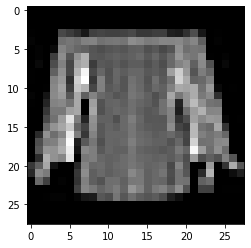

Label: 6


In [23]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

#### Further Reading
- [`torch.utils.data` API](https://pytorch.org/docs/stable/data.html)

## 3. Transforms

We use __transforms__ to perform some manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters 
- `transform` to modify the features and 
- `target_transform` to modify the labels - that accept callables containing the transformation logic. 

The [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html) module offers several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are integers. For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors. To make these transformations, we use `ToTensor` and `Lambda`.

#### `ToTensor()`
[ToTensor](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor) converts a PIL image or NumPy `ndarray` into a `FloatTensor`. and scales the image's pixel intensity values in the range [0., 1.]

#### Lambda Transforms
Lambda transforms apply any user-defined lambda function. Here, we define a function to turn the integer into a one-hot encoded tensor. It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls `scatter_` which assigns a `value=1` on the index as given by the label `y`.

In [24]:
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

#### Further Reading
- [`torchvision.transforms` API](https://pytorch.org/vision/stable/transforms.html)

## 4. Build the Neural Network

Neural networks comprise of layers/modules that perform operations on data. The [`torch.nn`](https://pytorch.org/docs/stable/nn.html) namespace provides all the building blocks you need to build your own neural network. Every module in PyTorch subclasses the [`nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). A neural network is a module itself that consists of other modules (layers). This nested structure allows for building and managing complex architectures easily.

### 4.1 Get Device for Training

Check if [`torch.cuda`](https://pytorch.org/docs/stable/notes/cuda.html) is available, else we continue to use the CPU.

In [25]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


### 4.2 Define the Class

1. Define the neural network by subclassing `nn.Module`. 
2. In `__init__`, initialize the neural network layers 
3. In `forward` method, `nn.Module` subclass implements the operations on input data.

In [26]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

We create an instance of `NeuralNetwork`, and move it to the device, and print its structure.

In [27]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


To use the model, we pass it the input data. This executes the model's `forward`, along with some [background operations](https://github.com/pytorch/pytorch/blob/270111b7b611d174967ed204776985cefca9c144/torch/nn/modules/module.py#L866). Do not call `model.forward()` directly!

Calling the model on the input returns a 10-dimensional tensor with raw predicted values for each class. We get the prediction probabilities by passing it through an instance of the `nn.Softmax` module.

In [28]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([6])


### 4.3 Model Layers

Let’s break down the layers in the FashionMNIST model. To illustrate it, we will take a sample minibatch of 3 images of size 28x28 and see what happens to it as we pass it through the network.

In [29]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


#### `nn.Flatten`

We initialize the [`nn.Flatten`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values ( the minibatch dimension (at dim=0) is maintained).

In [31]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


#### `nn.Linear`

The [linear layer](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) is a module that applies a linear transformation on the input using its stored weights and biases.

In [33]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


#### `nn.ReLU`

Non-linear activations are what create the complex mappings between the model's inputs and outputs. They are applied after linear transformations to introduce nonlinearity, helping neural networks learn a wide variety of phenomena. [`nn.ReLU`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)

In [34]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.1646,  0.2348, -0.1702,  0.0789,  0.0970, -0.0428,  0.3176,  0.2071,
         -0.2189, -0.1354,  0.4501,  0.0536, -0.3254, -0.3421,  0.3900, -0.1895,
         -0.1656,  0.2417,  0.1402, -0.1462],
        [ 0.4855,  0.5729, -0.0469, -0.0330,  0.2385,  0.1576,  0.5763,  0.3865,
         -0.0012,  0.2074,  0.4351,  0.1136, -0.6401, -0.1501,  0.3336,  0.0329,
         -0.2546,  0.0288, -0.2311, -0.0535],
        [ 0.3119,  0.5204,  0.0745, -0.4346,  0.2684,  0.0481,  0.0870, -0.1941,
         -0.0051,  0.1470,  0.2851, -0.0124, -0.6239, -0.0493,  0.0598, -0.0856,
         -0.1905,  0.1692, -0.0121, -0.2321]], grad_fn=<AddmmBackward>)


After ReLU: tensor([[0.1646, 0.2348, 0.0000, 0.0789, 0.0970, 0.0000, 0.3176, 0.2071, 0.0000,
         0.0000, 0.4501, 0.0536, 0.0000, 0.0000, 0.3900, 0.0000, 0.0000, 0.2417,
         0.1402, 0.0000],
        [0.4855, 0.5729, 0.0000, 0.0000, 0.2385, 0.1576, 0.5763, 0.3865, 0.0000,
         0.2074, 0.4351, 0.1136, 0.0000, 0.0000, 0.333

#### `nn.Sequential`

[`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can use sequential containers to put together a quick network like `seq_modules`.`

In [35]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

#### `nn.Softmax`

The last linear layer of the neural network returns logits - raw values in [-infty, infty] - which are passed to the [`nn.Softmax`] module. The logits are scaled to values [0, 1] representing the model’s predicted probabilities for each class. `dim` parameter indicates the dimension along which the values must sum to 1.

In [36]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

### 4.4 Model Parameters

Many layers inside a neural network are _parameterized_, i.e. have associated weights and biases that are optimized during training. Subclassing `nn.Module` automatically tracks all fields defined inside your model object, and makes all parameters accessible using your model's `parameters()` or `named_parameters()` methods.

In [37]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0262, -0.0356,  0.0105,  ..., -0.0208, -0.0157,  0.0047],
        [-0.0319, -0.0120,  0.0187,  ..., -0.0097,  0.0294,  0.0259]],
       grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0352,  0.0263], grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0056, -0.0323,  0.0359,  ..., -0.0318, -0.0228,  0.0430],
        [-0.0240,  0.0024,  0.0087,  ...,  0.0257, -0.0048, -0.0302]],
       grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.bias | S

### Further Reading
- [`torch.nn` API](https://pytorch.org/docs/stable/nn.html)